In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.linear_model import LassoCV, Lasso
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

In [2]:
train_ori = pd.read_csv('train.csv')
test_ori = pd.read_csv('test.csv')
y_ori = train_ori['price']
train = pd.concat([train_ori.drop('price',axis=1),test_ori],axis=0,ignore_index=True)
y = np.log(y_ori)

In [17]:
train['amenities_clean'] = np.nan
train['amenities_clean'] = train['amenities_clean'].astype('object')

for i in tqdm(range(len(train['amenities']))):
    train.at[i,'amenities_clean'] = train.loc[i,'amenities'][2:-2].split('", "')
    
for i in tqdm(range(len(train['amenities_clean']))):
    for j in range(len(train.loc[i,'amenities_clean'])):
        if 'Fast wifi \\u2013' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Fast Wifi'
        if 'Wifi \\u2013' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Wifi'
        if 'HDTV' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'HD Television'
        if 'TV' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'TV'
        if 'body soap' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Body soap'
        if 'shampoo' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Shampoo'
        if 'refrigerator' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Refrigerator'
        if 'fridge' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Refrigerator'
        if 'conditioner' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Conditioner'
        if 'stove' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Stove'
        if 'oven' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Oven'
        if 'sound system' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Sound system'
        if 'Sound system' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Sound system'
        if 'Clothing storage' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Clothing storage'
        if 'Children\\u2019s books and toys' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Children\\u2019s books and toys'
        if 'Shared hot tub' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Hot tub'
        if 'Private hot tub' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Private hot tub'
        if 'Shared pool' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Pool'
        if 'Shared indoor pool' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Pool'
        if 'Shared outdoor pool' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Pool'
        if 'Private pool' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Private pool'
        if 'Private indoor pool' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Private pool'
        if 'Private outdoor pool' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Private pool'
        if 'Free washer' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Washer'
        if 'Paid washer' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Washer'
        if 'Washer' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Washer'
        if 'Dryer' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Dryer'
        if 'Free dryer' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Dryer'
        if 'Paid dryer' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Dryer'
        if 'on premises' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Parking on premises'
        if 'off premises' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Parking off premises'
        if 'Free street parking' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Parking off premises'
        if 'conditioning' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Air conditioning'
        if 'Game console' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Game console'
        if 'Gym' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Gym'
        if 'gym' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Gym'
        if 'coffee' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Coffee maker'
        if 'sauna' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Sauna'
        if 'high chair' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'High chair'
        if 'High chair' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'High chair'
        if 'crib' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Crib'
        if 'Crib' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Crib'
        if 'Fenced garden or backyard' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Private garden or backyard'
        if 'Private fenced garden or backyard' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Private garden or backyard'
        if 'Shared fenced garden or backyard' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Shared garden or backyard'
        if 'Private fenced garden or backyard' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Private garden or backyard'

100%|██████████████████████████████████████| 6000/6000 [01:24<00:00, 70.90it/s]


In [18]:
amen_list = train['amenities_clean'].to_list()
vectorizer = CountVectorizer(analyzer=lambda x: x)
bow = vectorizer.fit_transform(amen_list)
bow_df = pd.DataFrame(bow.todense(), columns = vectorizer.get_feature_names_out())

# train['description'][train['description'].isna()] = ''
# train['neighborhood_overview'][train['neighborhood_overview'].isna()] = ''

# corpus_des = [i for i in train['description']]
# corpus_des_neighbor = [i for i in train['neighborhood_overview']]

# tfidf_vectorizer = TfidfVectorizer(stop_words = 'english')
# tfidf_vectorizer.fit(corpus_des)
# tfidf = tfidf_vectorizer.transform(corpus_des)
# features = pd.DataFrame(tfidf.todense(), columns = tfidf_vectorizer.get_feature_names_out())

# tfidf_vectorizer_neighbor = TfidfVectorizer(stop_words = 'english')
# tfidf_vectorizer_neighbor.fit(corpus_des_neighbor)
# tfidf_neighbor = tfidf_vectorizer_neighbor.transform(corpus_des)
# features_neighbor = pd.DataFrame(tfidf_neighbor.todense(), columns = tfidf_vectorizer_neighbor.get_feature_names_out())

# all_features = pd.concat([bow_df,features,features_neighbor],axis=1)

In [19]:
## room_type
room_type_dummy=np.select(
    condlist=[ 
        train['room_type'].str.contains('Private', case=False),
        train['room_type'].str.contains('entire', case=False),
        train['room_type'].str.contains('shared', case=False),
        ],
    choicelist=['Private', 'entire', 'shared'],
    default='Hotel'
)
room_type_dummy = pd.DataFrame(room_type_dummy,columns=['room_type_dummy'])
room_type_dummy=pd.get_dummies(room_type_dummy)
## Instant bookable
instant_bookable_dummy=pd.get_dummies(train['instant_bookable'],drop_first = True)
instant_bookable_dummy.columns=['instant_bookable_dummy']
## property type
la=train['property_type']
property_type_dummy = np.select(
    condlist=[
        la.str.contains('Private', case=False),
        la.str.contains('entire', case=False),
        ],
    choicelist=['Private', 'entire'],
    default='others'
)

property_type_dummy = pd.DataFrame(property_type_dummy,columns=['property_type_dummy'])
property_type_dummy=pd.get_dummies(property_type_dummy)
# Minimum night
minimum_night=train['minimum_nights']

minimum_night.values[minimum_night < 28] = 0
minimum_night.values[minimum_night >= 28] = 1

# Emily

In [20]:
train["host_response_time"] = train["host_response_time"].fillna('NA')
host_response_time_dummy = np.select(
    condlist=[ 
       train['host_response_time'].str.contains('within an hour', case=False),
        train['host_response_time'].str.contains('within a few hours', case=False),
        train['host_response_time'].str.contains('within a day', case=False),
        train['host_response_time'].str.contains('a few days or more', case=False),
        ],
    choicelist=['within an hour', 'within a few hours', 'within a day','a few days or more'],
    default='others'
)
host_response_time_dummy = pd.DataFrame(host_response_time_dummy,columns=['host_response_time_dummy'])
host_response_time_dummy = pd.get_dummies(host_response_time_dummy)

train["host_response_rate"] = train["host_response_rate"].astype('str')
train["host_response_rate"] = train["host_response_rate"].str.replace("%","")
train["host_response_rate"] = train["host_response_rate"].astype('float')
def hostrrate(rrate):
    if rrate > 75:
        return 'rrate over 75'
    elif rrate > 50:
        return 'rrate over 50'
    else:
        return 'rrate under 50'
train["host_response_rate"] = train["host_response_rate"].apply(hostrrate)
host_response_rate_dummy = np.select(
    condlist=[ 
       train['host_response_rate'].str.contains('rrate over 50', case=False),
        train['host_response_rate'].str.contains('rrate over 75', case=False),
        ],
    choicelist=['rrate over 50', 'rrate over 75',],
    default='rrate under 50'
)
host_response_rate_dummy = pd.DataFrame(host_response_rate_dummy,columns=['host_response_rate_dummy'])
host_response_rate_dummy = pd.get_dummies(host_response_rate_dummy)

train["host_acceptance_rate"] = train["host_acceptance_rate"].astype('str')
train["host_acceptance_rate"] = train["host_acceptance_rate"].str.replace("%","")
train["host_acceptance_rate"] = train["host_acceptance_rate"].astype('float')
def hostarate(arate):
    if arate > 75:
        return 'arate over 75'
    elif arate > 50:
        return 'arate over 50'
    else:
        return 'arate under 50'
train["host_acceptance_rate"] = train["host_acceptance_rate"].apply(hostarate)
host_acceptance_rate_dummy = np.select(
    condlist=[ 
       train['host_acceptance_rate'].str.contains('rrate over 50', case=False),
        train['host_acceptance_rate'].str.contains('rrate over 75', case=False),
        ],
    choicelist=['rrate over 50', 'rrate over 75',],
    default='rrate under 50'
)
host_acceptance_rate_dummy = pd.DataFrame(host_acceptance_rate_dummy,columns=['host_acceptance_rate_dummy'])
host_acceptance_rate_dummy = pd.get_dummies(host_acceptance_rate_dummy)

host_is_superhost_dummy=pd.get_dummies(train['host_is_superhost'],drop_first = True)
host_is_superhost_dummy.columns=['host_is_superhost']

host_identity_verified_dummy=pd.get_dummies(train['host_identity_verified'],drop_first = True)
host_identity_verified_dummy.columns=['host_identity_verified']

train.loc[train["host_verifications"] == "['email', 'phone', 'work_email']", "host_verifications"] = 'Three types of verifications'
train.loc[train["host_verifications"] == "['email', 'phone']", "host_verifications"] = 'Two types of verifications'
train.loc[train["host_verifications"] == "['phone', 'work_email']", "host_verifications"] = 'Two types of verifications'
train.loc[train["host_verifications"] == "['email']", "host_verifications"] = 'One types of verifications'
train.loc[train["host_verifications"] == "['phone']", "host_verifications"] = 'One types of verifications'
train.loc[train["host_verifications"] == "[]", "host_verifications"] = 'Two types of verifications'
host_verifications_dummy = np.select(
    condlist=[ 
       train['host_verifications'].str.contains('One types of verifications', case=False),
        train['host_verifications'].str.contains('Two types of verifications', case=False),
        ],
    choicelist=['One types of verifications', 'Two types of verifications',],
    default='Three types of verifications'
)
host_verifications_dummy = pd.DataFrame(host_verifications_dummy,columns=['host_verifications_dummy'])
host_verifications_dummy = pd.get_dummies(host_verifications_dummy)


# Location

In [3]:
Location = pd.get_dummies(train['neighbourhood_cleansed'])

In [38]:
Score = train.iloc[:,26:-3]

In [161]:
emily = pd.concat([host_response_time_dummy, host_response_rate_dummy,host_acceptance_rate_dummy,host_is_superhost_dummy,train['host_listings_count'],host_verifications_dummy],axis=1)

In [189]:
train['start_year'] = pd.to_datetime(train['host_since']).dt.year

In [195]:
# train['bedrooms'],train['beds'],np.log(train['accommodates']
zeshen=pd.concat([minimum_night, property_type_dummy,instant_bookable_dummy,room_type_dummy,np.log(train['bedrooms'])],axis=1)

In [185]:
train['bedrooms'].loc[train['bedrooms'].isna()] = round(train['accommodates'][train['bedrooms'].isna()]/2,0)
train.loc[train['bedrooms'] == 0,'bedrooms'] = 1

/var/folders/nq/xtfndg6x53g0ffw66wk7g0100000gn/T/ipykernel_86475/963675506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['bedrooms'].loc[train['bedrooms'].isna()] = round(train['accommodates'][train['bedrooms'].isna()]/2,0)


In [9]:
# combine = pd.concat([zeshen,Location,Score,bow_df],axis=1)
combine = pd.concat([Location],axis=1)

# Models

In [30]:
r_score_list = np.zeros(1000)

for i in range(1000):
    X_train, X_vali, y_train, y_vali = train_test_split(combine[:4000], y, test_size = 0.2)#,random_state = 2)
    linear_reg = LinearRegression()
    linear_reg.fit(X_train, y_train)
#     linear_reg.score(X_vali,y_vali)
    r_score_list[i] = linear_reg.score(X_vali,y_vali)*100


In [53]:
pd.Series(r_score_list)[0:910].mean()

16.55662121362253

In [216]:
mean_squared_error(y_true=y_vali, y_pred=linear_reg.predict(X_vali), squared=True)

0.13921126843677087

<BarContainer object of 14 artists>

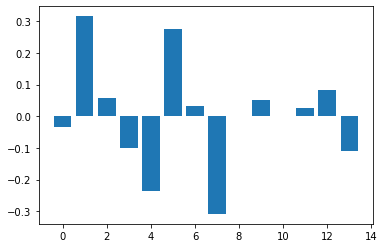

In [167]:
plt.bar(np.arange(len(linear_reg.coef_)),linear_reg.coef_)

In [168]:
linear_reg.coef_

array([-3.45353519e-02,  3.15873471e-01,  5.60467305e-02, -1.01815956e-01,
       -2.35568894e-01,  2.75824169e-01,  3.28335742e-02, -3.08657743e-01,
        2.77555756e-17,  5.13182451e-02,  1.95840699e-03,  2.61512761e-02,
        8.25136665e-02, -1.08664943e-01])

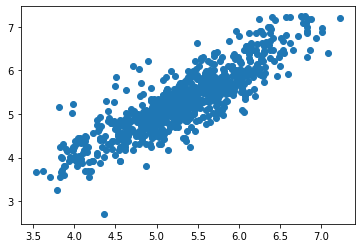

In [217]:
plt.scatter(linear_reg.predict(X_vali),y_vali)

# Submission

In [99]:
linear_reg = LinearRegression()
linear_reg.fit(combine[:4000], y)

LinearRegression()

In [111]:
test = combine[-2000:].reset_index(drop=True)

In [114]:
result = linear_reg.predict(test)
result = np.clip(result, y_train.min(), y_train.max())

In [118]:
# pd.DataFrame(np.exp(result),columns=['price']).to_csv('OLS_submission.csv')

# OLS Ridge Lasso Elastic Net

In [136]:
scaler = StandardScaler()
scaler.fit(combine[:4000])

X_scaled = scaler.transform(combine[:4000])
# X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(combine[:4000], y, test_size = 0.2)
# linear_reg = LinearRegression()
# linear_reg.fit(X_train_scaled, y_train)
# linear_reg.score(X_test_scaled,y_test)

In [137]:
ols = LinearRegression()
ols.fit(X_train_scaled, y_train);

In [138]:
alphas = np.logspace(-5, 4, 151)
ridge = RidgeCV(alphas=alphas, cv=5)
ridge.fit(X_train_scaled, y_train)
best_ridge = Ridge(alpha=ridge.alpha_);

In [139]:
lasso = LassoCV(cv=5)
lasso.fit(X_train_scaled, y_train)
best_lasso = Lasso(alpha=lasso.alpha_);

In [140]:
elastic_net = ElasticNetCV(l1_ratio=[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99], cv=5)
elastic_net.fit(X_train_scaled, y_train)
best_elastic_net = ElasticNet(l1_ratio=elastic_net.l1_ratio_, alpha=elastic_net.alpha_);

In [141]:
predictors = list(X_train.columns.values)

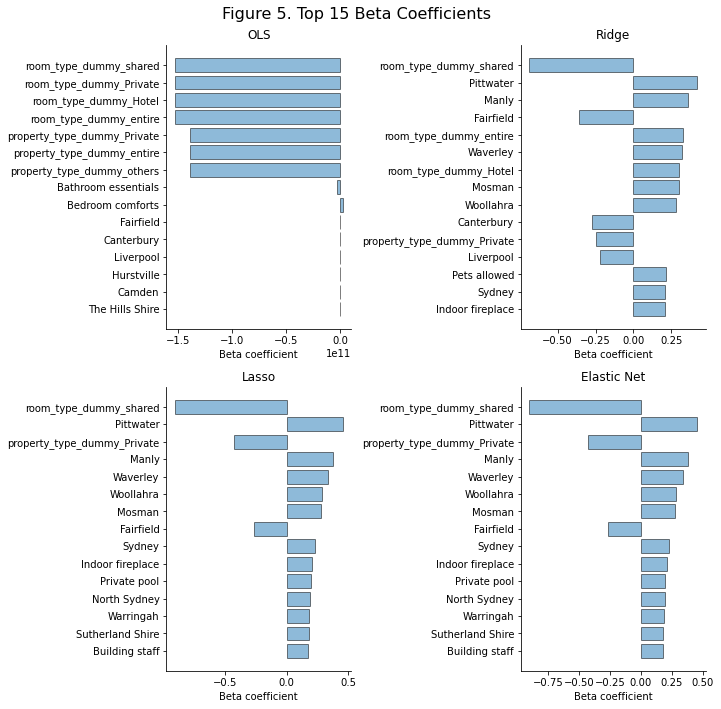

In [142]:
n_coefs = 15
model = [ols, ridge, lasso, elastic_net]
model_name = ['OLS', 'Ridge', 'Lasso', 'Elastic Net']
plt.figure(figsize = (10, 10))

for i in range(len(model)):
    betas = model[i].coef_

    indicies = np.argsort(np.abs(betas))[-n_coefs:]
    top_predictors = np.array(predictors)[indicies]
    top_betas = betas[indicies]

    plt.subplot(2, 2, i+1)
    plt.barh(top_predictors, top_betas, alpha=0.5, edgecolor='black')
    sns.despine()
    plt.xlabel('Beta coefficient')
    plt.title(model_name[i]);
plt.suptitle('Figure 5. Top {} Beta Coefficients'.format(n_coefs), fontsize = 16)
plt.tight_layout()

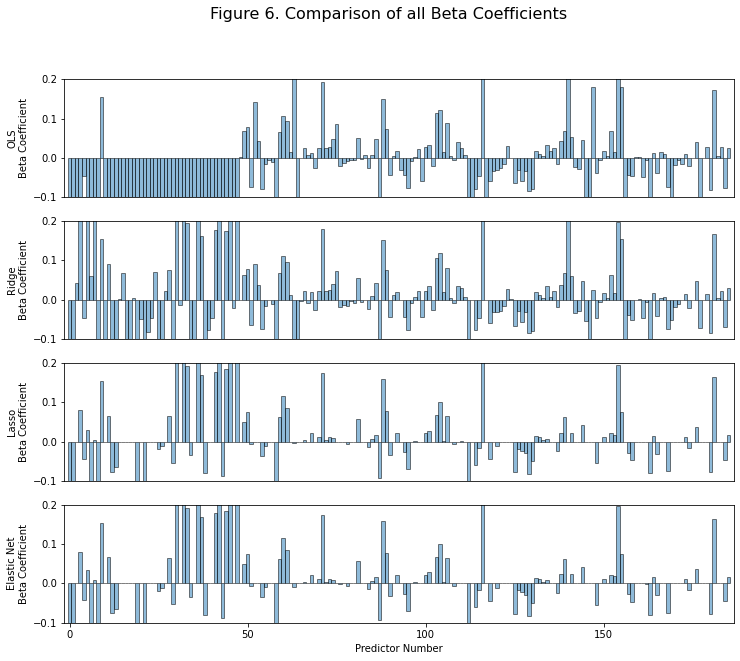

In [143]:
model = [ols, ridge, lasso, elastic_net]
model_name = ['OLS', 'Ridge', 'Lasso', 'Elastic Net']
p = len(predictors)

plt.figure(figsize = (12, 10))
for i in range(len(model)):
    plt.subplot(len(model), 1, i+1)
    plt.bar(np.arange(p), model[i].coef_, width=1, alpha=0.5, edgecolor = 'black')
    plt.xticks([])
    plt.xlim([-1.5, p+0.5])
    plt.ylim([-0.1, 0.2])
    plt.ylabel(model_name[i] + '\nBeta Coefficient')
plt.xticks([0, 50, 100, 150])
plt.xlabel('Predictor Number')
plt.suptitle('Figure 6. Comparison of all Beta Coefficients', fontsize=16);

In [144]:
results = pd.DataFrame(columns=['RMSE', 'R2'])

ols = LinearRegression()
y_pred = cross_val_predict(ols, X_train_scaled, y_train, cv=5)

# OLS sometimes makes crazy predictions so we clip them to something sensible
y_pred = np.clip(y_pred, y_train.min(), y_train.max())

rmse = mean_squared_error(np.exp(y_train), np.exp(y_pred), squared=False)
r2 = r2_score(np.exp(y_train), np.exp(y_pred))

results.loc['OLS'] = rmse, r2

y_pred = cross_val_predict(best_ridge, X_train_scaled, y_train, cv=5)

rmse = mean_squared_error(np.exp(y_train), np.exp(y_pred), squared=False)
r2 = r2_score(np.exp(y_train), np.exp(y_pred))

results.loc['Ridge'] = rmse, r2

y_pred = cross_val_predict(best_lasso, X_train_scaled, y_train, cv=5)

rmse = mean_squared_error(np.exp(y_train), np.exp(y_pred), squared=False)
r2 = r2_score(np.exp(y_train), np.exp(y_pred))

results.loc['Lasso'] = rmse, r2

y_pred = cross_val_predict(best_elastic_net, X_train_scaled, y_train, cv=5)

rmse = mean_squared_error(np.exp(y_train), np.exp(y_pred), squared=False)
r2 = r2_score(np.exp(y_train), np.exp(y_pred))

results.loc['Elastic Net'] = rmse, r2

In [145]:
results.round(2)

,RMSE,R2
OLS,149.34,0.61
Ridge,151.68,0.60
Lasso,152.90,0.59
Elastic Net,152.91,0.59


In [146]:
y_pred = lasso.predict(X_test_scaled)

rmse = mean_squared_error(np.exp(y_test), np.exp(y_pred), squared=False)
r2 = r2_score(np.exp(y_test), np.exp(y_pred))

print('Our lasso model has a test RMSE of {:.0f} and a test r-squared coefficient of {:.2f}'.format(rmse, r2))

Our lasso model has a test RMSE of 155 and a test r-squared coefficient of 0.51
